In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [123]:
dataset = pd.read_csv('/content/data.csv')
dataset.head()

,Gender,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Sleep Disorder,mmAge,mmPhysical Activity Level,mmHeart Rate,mmDaily Steps
0,1.0,6.1,6,6,1.0,1.0,0.00000,0.2,0.571429,0.171429
1,1.0,6.2,6,8,0.0,1.0,0.03125,0.5,0.476190,1.000000
2,1.0,6.2,6,8,0.0,1.0,0.03125,0.5,0.476190,1.000000
3,1.0,5.9,4,8,1.0,0.0,0.03125,0.0,0.952381,0.000000
4,1.0,5.9,4,8,1.0,0.0,0.03125,0.0,0.952381,0.000000


In [124]:
vals = dataset["Stress Level"].unique()
vals

array([6, 8, 7, 4, 3, 5])

In [125]:
cols_for_clusters = ['Gender', 'mmAge', 'Sleep Duration', 'Sleep Disorder', 'BMI Category', 'mmPhysical Activity Level',  'Quality of Sleep', 'mmHeart Rate', 'mmDaily Steps']

df= dataset[cols_for_clusters].copy()

In [126]:
df.head()

,Gender,mmAge,Sleep Duration,Sleep Disorder,BMI Category,mmPhysical Activity Level,Quality of Sleep,mmHeart Rate,mmDaily Steps
0,1.0,0.00000,6.1,1.0,1.0,0.2,6,0.571429,0.171429
1,1.0,0.03125,6.2,1.0,0.0,0.5,6,0.476190,1.000000
2,1.0,0.03125,6.2,1.0,0.0,0.5,6,0.476190,1.000000
3,1.0,0.03125,5.9,0.0,1.0,0.0,4,0.952381,0.000000
4,1.0,0.03125,5.9,0.0,1.0,0.0,4,0.952381,0.000000


In [127]:
X = df
y = dataset['Stress Level']

In [128]:
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans

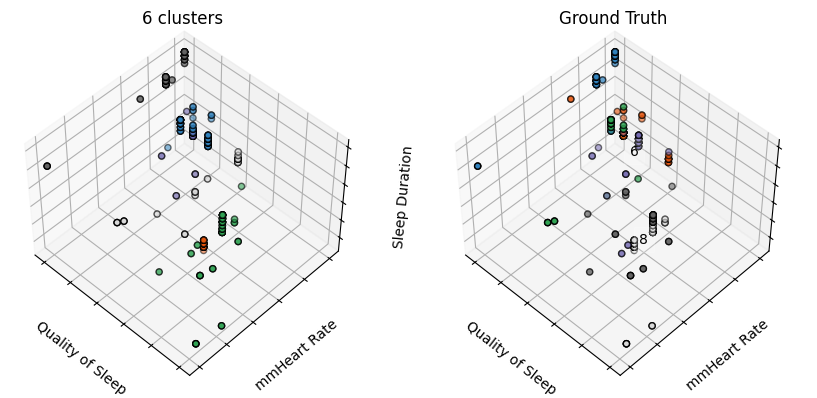

In [129]:
estimators = [
    ("k_means_stress_6", KMeans(n_clusters=6)),
]

fig = plt.figure(figsize=(10, 8))
titles = ["6 clusters"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(1, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["Quality of Sleep"], X["mmHeart Rate"], X["Sleep Duration"], c=labels.astype(float), cmap='tab20c', edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Quality of Sleep")
    ax.set_ylabel("mmHeart Rate")
    ax.set_zlabel("Sleep Duration")
    ax.set_title(title)

ax = fig.add_subplot(1, 2, 2, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = dataset[dataset["Stress Level"]==name]
    ax.text3D(
        ds["Quality of Sleep"].mean(),
        ds["mmHeart Rate"].mean(),
        ds["Sleep Duration"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["Quality of Sleep"], X["mmHeart Rate"], X["Sleep Duration"], c=y, cmap='tab20c', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Quality of Sleep")
ax.set_ylabel("mmHeart Rate")
ax.set_zlabel("Sleep Duration")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [130]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

n_clusters = np.arange(2, 21)

In [131]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.48
Adjusted Rand Index: 0.52


In [132]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n


In [133]:
best_metric

[4,
 0.45951516702415146,
 0.4043722836810012,
 array([[0.73793103, 0.31077586, 7.46758621, 0.93793103, 0.02068966,
         0.66724138, 7.75172414, 0.19277504, 0.64817734],
        [0.89411765, 0.29007353, 6.24705882, 0.47058824, 0.55294118,
         0.13823529, 5.82352941, 0.39607843, 0.36991597],
        [0.02816901, 0.86927817, 8.24366197, 0.53521127, 0.49295775,
         0.42605634, 9.        , 0.10261569, 0.43541247],
        [0.05479452, 0.63056507, 6.41506849, 0.06849315, 1.        ,
         0.59018265, 6.53424658, 0.31637312, 0.6518591 ]])]

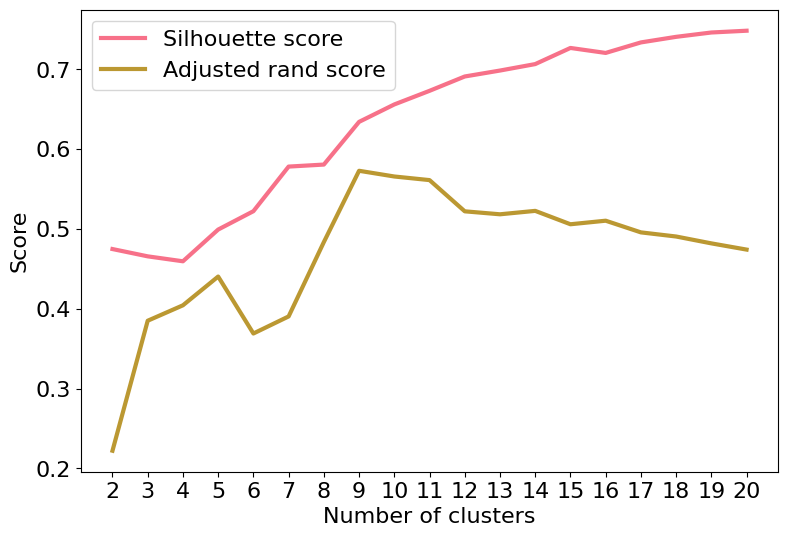

In [134]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

In [135]:
from scipy.cluster.hierarchy import linkage, dendrogram

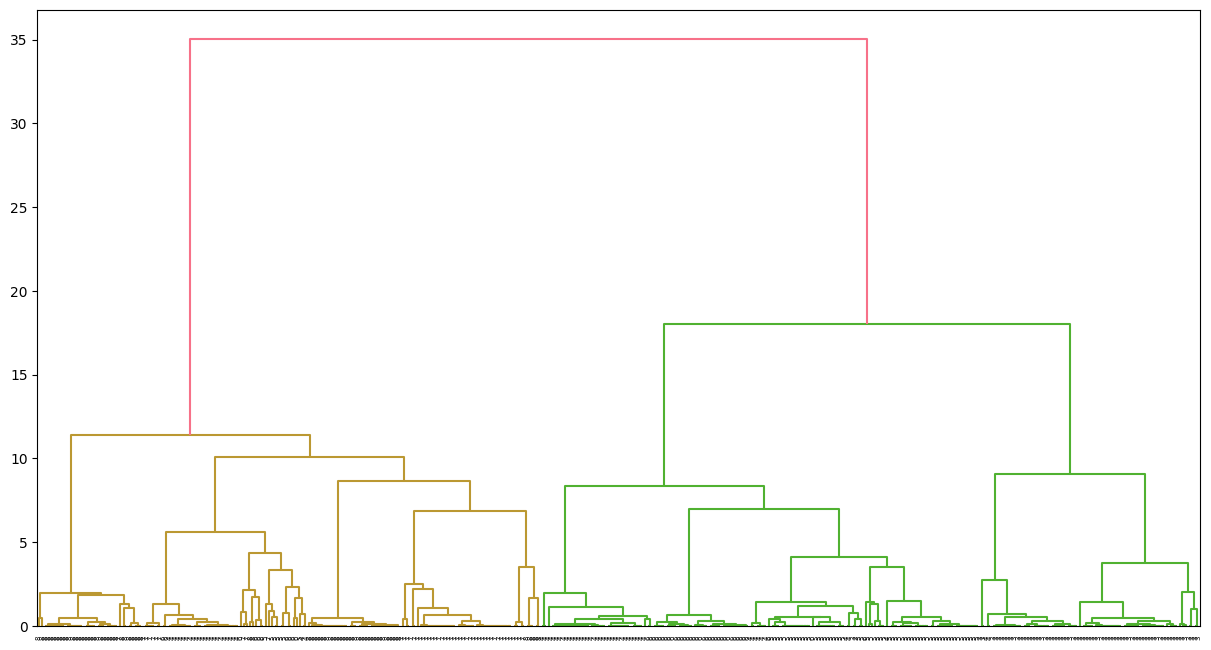

In [136]:
samples = df.values

mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

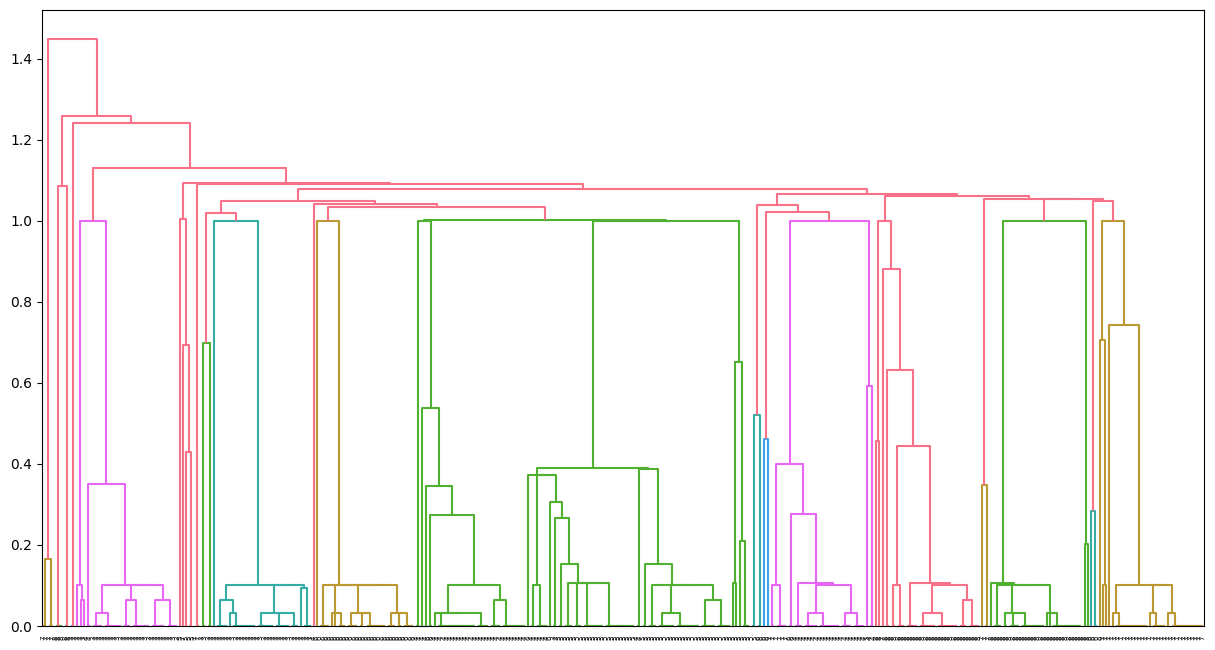

In [137]:
samples = df.values

mergings = linkage(samples, method='single')

plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [138]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import mutual_info_score

In [139]:
mins = X.shape[1]

['#562C2C', '#F2542D', '#F5DFBB', '#0E9594', '#127475', '#FF1053', '#6C6EA0', '#66C7F4', '#C1CAD6', '#FFFFFF', '#462749', '#E086D3', '#9DA3A4', '#604D53', '#5B507A', '#A53860', '#FFA5AB', '#FFBA49', '#06A77D', '#E7A977']


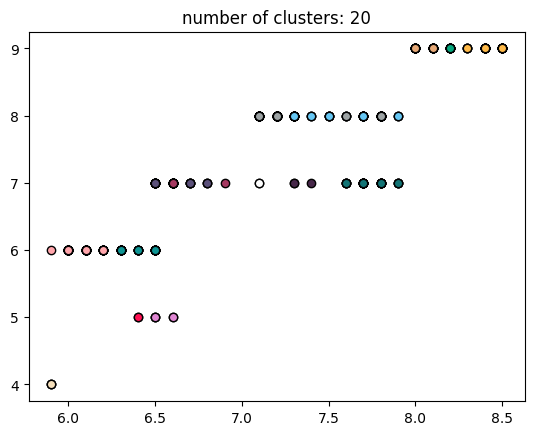

In [146]:
db = DBSCAN(eps=0.8, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['#562C2C', '#F2542D', '#F5DFBB', '#0E9594', '#127475', '#FF1053', '#6C6EA0', '#66C7F4', '#C1CAD6', '#FFFFFF', '#462749', '#E086D3', '#9DA3A4', '#604D53', '#5B507A', '#A53860', '#FFA5AB', '#FFBA49', '#06A77D', '#E7A977']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["Sleep Duration"], xy["Quality of Sleep"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["Sleep Duration"], xy["Quality of Sleep"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


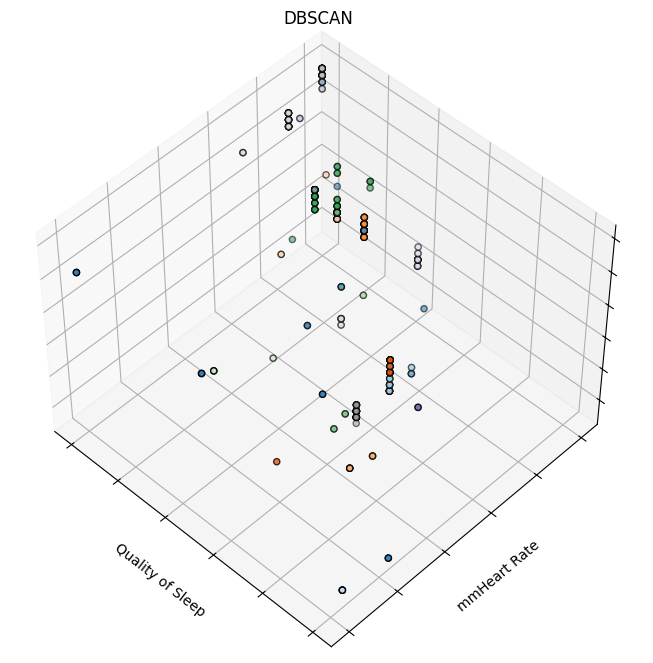

In [147]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["Quality of Sleep"], X["mmHeart Rate"], X["Sleep Duration"], c=labels.astype(float), cmap='tab20c', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Quality of Sleep")
ax.set_ylabel("mmHeart Rate")
ax.set_zlabel("Sleep Duratioh")
ax.set_title("DBSCAN")

plt.show()

In [148]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.72
Adjusted Rand Index: 0.50
